In [1]:
%matplotlib inline
from mpl_toolkits.basemap import Basemap
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt
import pandas as pd    
from matplotlib import colors
from matplotlib import legend
import pygplates
from matplotlib.patches import Polygon

# Import the lithologic data
#point_feature_filename_coals = '/Users/wenchaocao/Research/41_Paleobiology_Paleotectonics/1_csv2shapefile/PresentDay_LithData_Matthews2016_410-0Ma/CEG/PresentDay_LithData_Matthews2016_CEG_410-0Ma_Integrated/PresentDay_LithData_Matthews2016_CEG_410-0Ma_ToAgeCorrected.shp'

# deleted invalid data using EndAge
#point_feature_filename_coals = '/Users/wenchaocao/Research/41_Paleobiology_Paleotectonics/1_csv2shapefile/PresentDay_LithData_Matthews2016_410-0Ma/CEG/PresentDay_LithData_Matthews2016_CEG_410-0Ma_ToAgeCorrected_CookCut_InvalidDataDeleted_UsingEndAge.shp'

# deleted invalid data using MedianAge
#point_feature_filename_coals = '/Users/wenchaocao/Research/41_Paleobiology_Paleotectonics/1_csv2shapefile/PresentDay_LithData_Matthews2016_410-0Ma/CEG/PresentDay_LithData_Matthews2016_CEG_410-0Ma_ToAgeCorrected_AddStartAgeEngAge_CookCut_DeleteDataUsingMedianAge_FromAgeToAgeChangedBack.shp'

# PresentDay_LithData_Matthews2016_CEG_410-0Ma_ToAgeCorrected_CookCut_DeleteDataUsingStartAge
point_feature_filename_coals = '/Users/wenchaocao/Research/41_Paleobiology_Paleotectonics/1_csv2shapefile/PresentDay_LithData_Matthews2016_410-0Ma/CEG/PresentDay_LithData_Matthews2016_CEG_410-0Ma_ToAgeCorrected_CookCut_DeleteDataUsingStartAge.shp'

input_feature_collection_coals = pygplates.FeatureCollection(point_feature_filename_coals)

#Rotation:Global_EB_410-0Ma_GK07_Matthews_etal_PMAG_fixed_crossovers.rot
input_rotation_filename_Matthews2016PMAG_fixed = ['/Users/wenchaocao/Research/41_Paleobiology_Paleotectonics/Rotations/Global_EB_410-0Ma_GK07_Matthews_etal_PMAG_fixed_crossovers.rot']

# empty rotation
#input_rotation_filename_Matthews2016PMAG_fixed = ['/Users/wenchaocao/Desktop/New_Rotation.rot']

rotation_model = pygplates.RotationModel(input_rotation_filename_Matthews2016PMAG_fixed)


# contient polygons
continental_polygons = pygplates.FeatureCollection('/Users/wenchaocao/Research/41_Paleobiology_Paleotectonics/Rotations/ContPolys/PresentDay_ContinentalPolygons_Matthews++.shp')


# test: continental polysons
#continental_polygons = pygplates.FeatureCollection('/Users/wenchaocao/Research/41_Paleobiology_Paleotectonics/1_csv2shapefile/PresentDay_LithData_Matthews2016_410-0Ma/CEG/PresentDay_ContinentalPolygons_Matthews++.shp')


In [2]:
#pygplates.reconstruct(reconstructed_points,rotation_model,'Coals_Matthews2016_%sMa.shp' % age,age,anchor_plate_id=0)
#Coals_Reconstructed = pygplates.FeatureCollection('Coals_Matthews2016_%sMa.shp' % age) 
#Coals_Reconstructed.write('Coals_Matthews2016_%sMa.shp' % age)

# Reconstruct Continental Polygons
#pygplates.reconstruct(continental_polygons,rotation_model,'ContinPoly_Reconstructed_Matthews2016_%sMa.shp' % age,age,anchor_plate_id=0)
#ContinPoly_Reconstructed = pygplates.FeatureCollection('ContinPoly_Reconstructed_Matthews2016_%sMa.shp' % age)
#pygplates.reconstruct(continental_polygons,rotation_model,'ContinPoly_Reconstructed_Matthews2016_%sMa.shp' % age,age,anchor_plate_id=0)

In [3]:
age_range_list = [(419,393),   # Early Devonian
           (393,388),   # Middle Devonian (Eifelian)
           (388,383),   # Middle Devonian (Givetian)
           (383,359),   # Late Devonian
           (359,331),   # Early Carboniferous (Tournaisian-Visean)
           (331,323),   # Early Carboniferous (Serpukhovian)
           (323,307),   # Late Carboniferous (Bashkirian-Moscovian)
           (307,299),   # Late Carboniferous (Kasimovian-Gzhelian)
           (299,290),   # Early Permian (Asselian-Sakmarian)
           (290,252),   # Middle-Late Permian (Artinskian-Lopingian)
           (252,247),   # Early Triassic
           (247,237),   # Middle Triassic
           (237,201),   # Late Triassic
           (201,164),   # Early and Middle Jurassic
           (164,145),   # Late Jurassic
           (145,113),   # Early Cretaceous (Berriasian-Aptian)
           (113,89.8),   # Late Cretaceous (Albian-Turonian)
           (89.8,66.0),   # Late Cretaceous (Coniacian-Maastrichtian)
           (66.0,56.0),   # Paleocene
           (56.0,47.8),  # Early Eocene (Ypresian?)
           (47.8,33.9),  # Middle and Late Eocene
           (33.9,23.0),  # Oligocene
           (23.0,5.3),    # Miocene
           (0.01,-0.01)]
#print age_range_list[5:]

i = 0
for i in np.arange(0,24,1):
    Age = np.mean(age_range_list[i])
    print Age

406.0
390.5
385.5
371.0
345.0
327.0
315.0
303.0
294.5
271.0
249.5
242.0
219.0
182.5
154.5
129.0
101.4
77.9
61.0
51.9
40.85
28.45
14.15
0.0


In [4]:
def get_paleolithology(point_features,rotation_model):
    pX = []
    pY = []
    pAge = []
    LithCode=[]
    reconstructed_points = []
    for point in input_feature_collection_coals:
        lithcode = point.get_shapefile_attribute('LithCode')
        #if lithcode == 'C' and point.get_reconstruction_plate_id()!=0:
        #if lithcode == 'E' and point.get_reconstruction_plate_id()!=0:
        #if lithcode== 'T' or lithcode=='D' or lithcode=='G' and point.get_reconstruction_plate_id()!=0:
        BirthTime = np.median(point.get_valid_time())
        if BirthTime<410:
            pAge.append(BirthTime)
            point_rotation = rotation_model.get_rotation(BirthTime, point.get_reconstruction_plate_id(), anchor_plate_id=0) #obtain rotating rules
            reconstructed_point = point_rotation * point.get_geometry() # carry out reconstruction
            pX.append(reconstructed_point.to_lat_lon()[1])
            pY.append(reconstructed_point.to_lat_lon()[0])
            reconstructed_points.append(point)
            LithCode.append(point.get_shapefile_attribute('LithCode'))
    return pX,pY,pAge,LithCode

# reconstruct all data and get their x, y coordinates and ages
pX,pY,pAge,LithCode = get_paleolithology(input_feature_collection_coals,rotation_model)
data_xy = []
data_xy = zip(LithCode,pY,pX,pAge)
#print data_xy

In [ ]:
#df = pd.DataFrame(data_xy)
#writer = pd.ExcelWriter('LithData_PaleoXY_Matthews_New.xlsx', engine='xlsxwriter') # Evaporite
#df.to_excel(writer, sheet_name='Sheet1')
#writer.save()

In [ ]:
#data_xy = pd.read_excel('/Users/wenchaocao/Research/21_Python/2_GM/LithData_PaleoXY_Matthews_New.xlsx')
#data_xy.iloc[:,0]

406.0


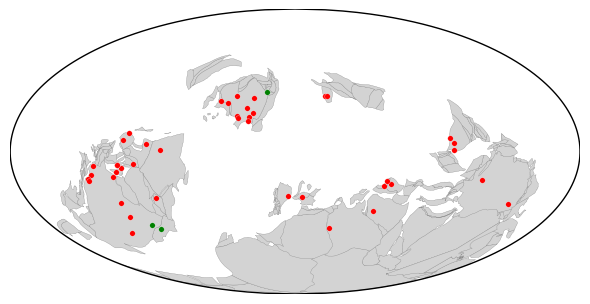

390.5


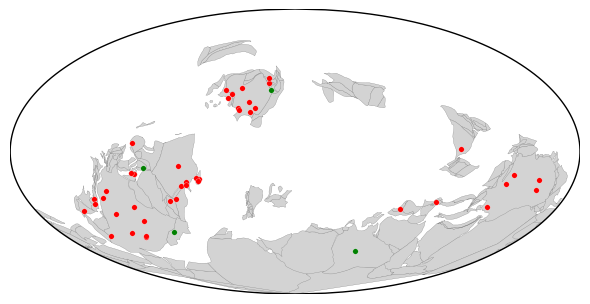

385.5


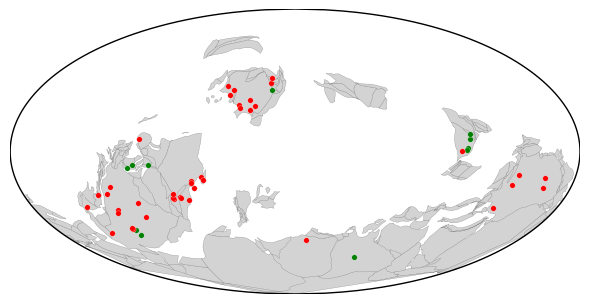

371.0


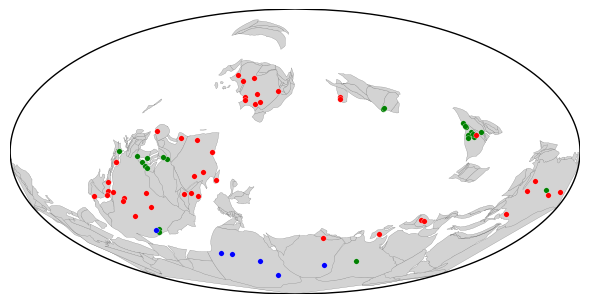

345.0


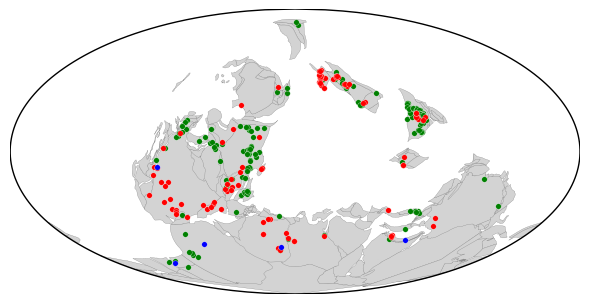

327.0


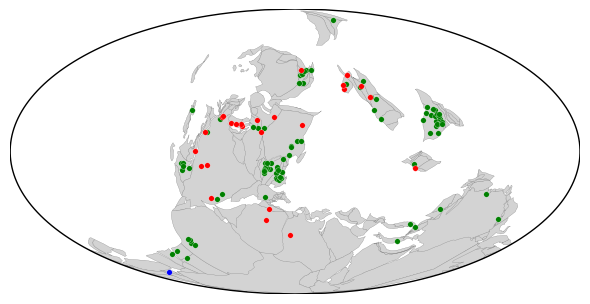

315.0


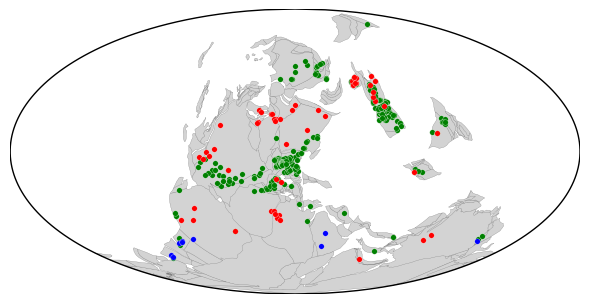

303.0


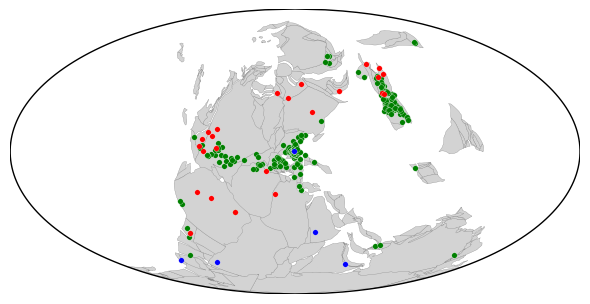

294.5


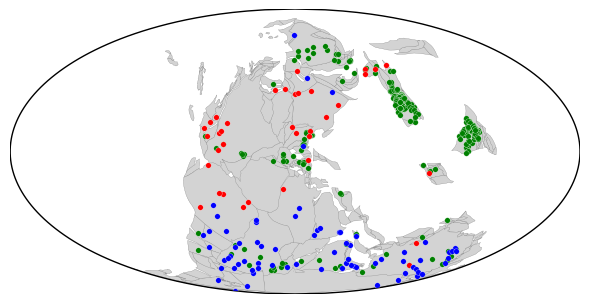

271.0


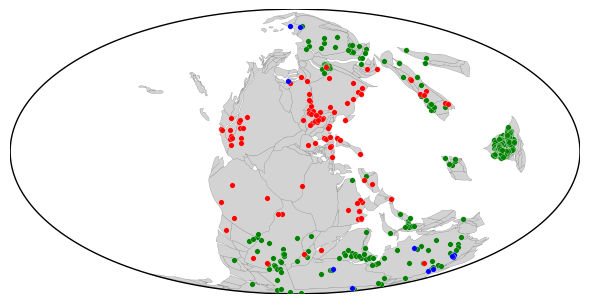

249.5


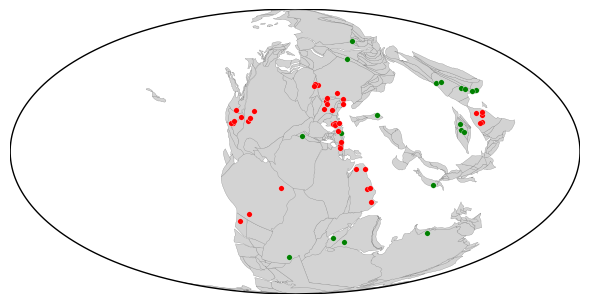

242.0


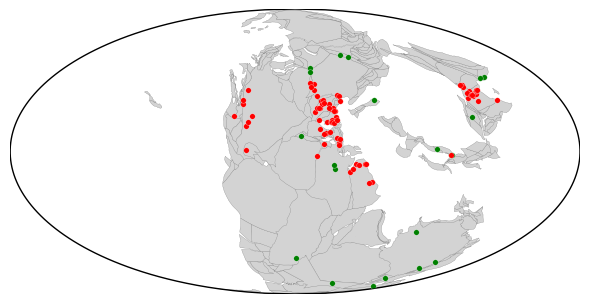

219.0


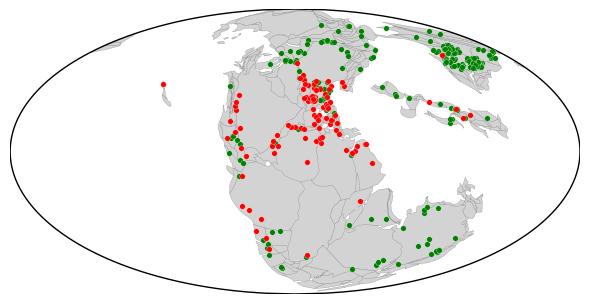

182.5


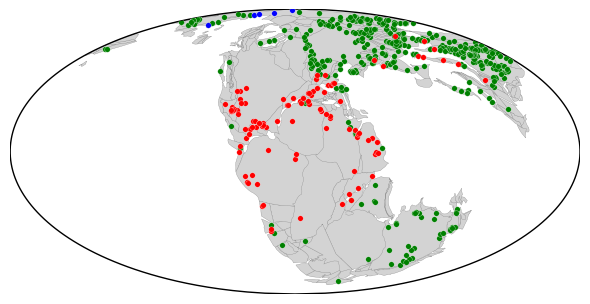

154.5


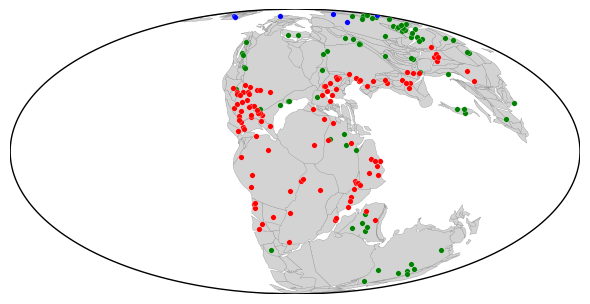

129.0


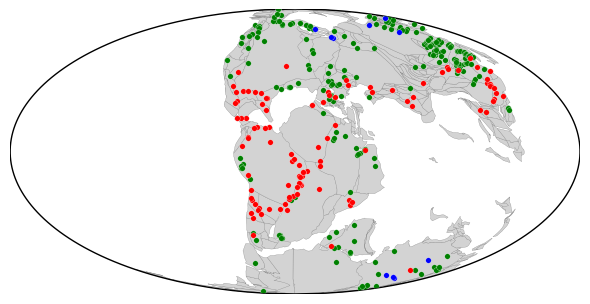

101.4


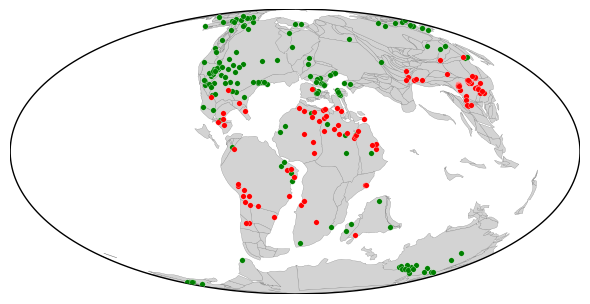

77.9


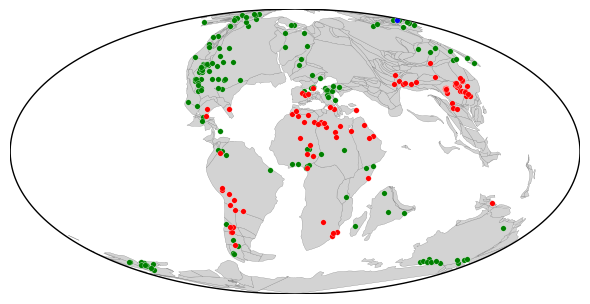

61.0


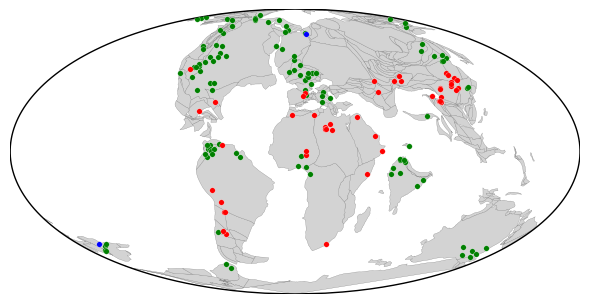

51.9


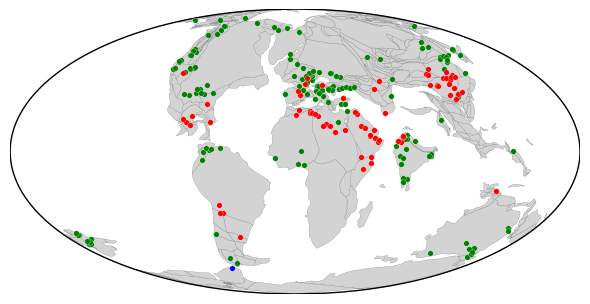

40.85


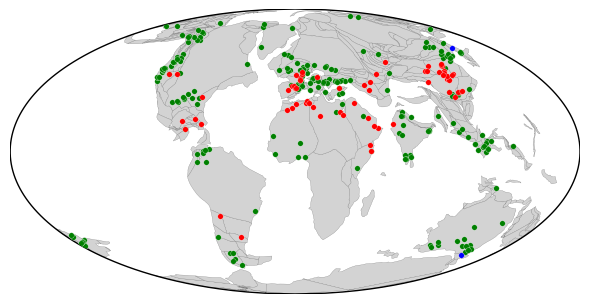

28.45


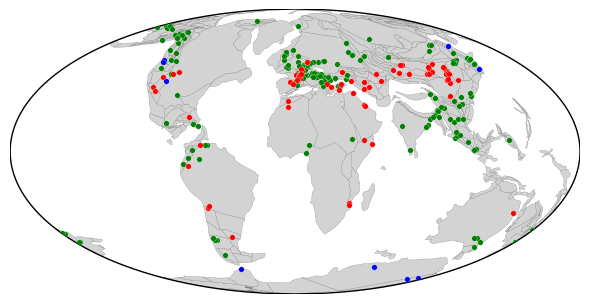

14.15


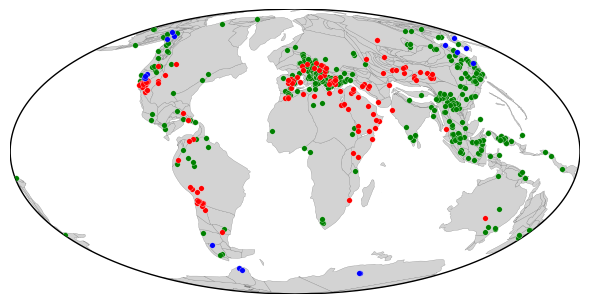

0.0


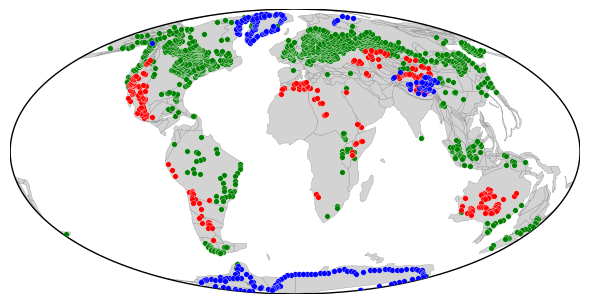

In [8]:
#fig, ax = plt.subplots(figsize=(20,18))

for i in np.arange(0,24,1):
    
    fig, ax = plt.subplots(figsize=(6,4))
    
    #ax = plt.subplot(6,4,i+1)
    
    # Reconstruct Continental Polygons
    age = np.mean(age_range_list[i])
    print age
    output_continent = 'temp.shp'
    pygplates.reconstruct(continental_polygons,rotation_model,output_continent,age,anchor_plate_id=0)    
    
    # plot continental polygons
    # resolution: c (crude), l (low), i (intermediate), h (high), f (full) or None
    m = Basemap(projection='moll',lat_0=0,lon_0=0,resolution='c', ax=ax)
    
    m.drawparallels(np.arange(-90,90,30),labels=[1,1,0,0],color='white', textcolor='black',linewidth=0.0)
    m.drawmeridians(np.arange(-180,180,60),labels=[0,0,0,1],color='white', textcolor='black',linewidth=0.0)
    
    shp_info = m.readshapefile('temp','shp',drawbounds=False,color='red')
    for nshape,seg in enumerate(m.shp):
        poly = Polygon(seg,facecolor='lightgrey',edgecolor='grey',linewidth=0.2)
        ax.add_patch(poly)
    
    
    # plot the lithologic data
    x,y = m(np.asarray(pX),np.asarray(pY))
    # Coals
    index = np.where((np.array(pAge) == np.mean(age_range_list[i])) & (np.array(LithCode) == 'C'))
    m.plot(np.array(x)[index],np.array(y)[index],'o',color='green',markeredgecolor='white',markersize=4, markeredgewidth=0.2) #markeredgewidth=0.2
    # Evaporites
    index = np.where((np.array(pAge) == np.mean(age_range_list[i])) & (np.array(LithCode) == 'E'))
    m.plot(np.array(x)[index],np.array(y)[index],'o',color='red',markeredgecolor='white',markersize=4, markeredgewidth=0.2)
    # Glacial
    index = np.where((np.array(pAge) == np.mean(age_range_list[i])) & ((np.array(LithCode) == 'T') | (np.array(LithCode) == 'D') | (np.array(LithCode) == 'G')))
    m.plot(np.array(x)[index],np.array(y)[index],'o',color='blue',markeredgecolor='white',markersize=4, markeredgewidth=0.2)

    
    '''
    # plot the lithologic data
    x,y = m(np.asarray(data_xy.iloc[:,2]),np.asarray(data_xy.iloc[:,1]))
    # Coals
    index = np.where((data_xy.iloc[:,3] == np.mean(age_range_list[i])) & (data_xy.iloc[:,0] == 'C'))
    m.plot(np.array(x)[index],np.array(y)[index],'o',color='green',markeredgecolor='white',markersize=4, markeredgewidth=0.2)
    # Evaporites
    index = np.where((np.array(data_xy.iloc[:,3]) == np.mean(age_range_list[i])) & (data_xy.iloc[:,0] == 'E'))
    m.plot(np.array(x)[index],np.array(y)[index],'o',color='red',markeredgecolor='white',markersize=4, markeredgewidth=0.2)
    # Glacial
    index = np.where((np.array(pAge) == np.mean(age_range_list[i])) & ((np.array(LithCode) == 'T') | (np.array(LithCode) == 'D') | (np.array(LithCode) == 'G')))
    m.plot(np.array(x)[index],np.array(y)[index],'o',color='blue',markeredgecolor='white',markersize=4, markeredgewidth=0.2)
    '''
    
    plt.title('%d Ma' % age, fontsize=16)
    plt.tight_layout()
    plt.savefig('Fig1_%dMa.jpg' % age,dpi=300) # 1000
    plt.show()

#plt.tight_layout()
#plt.savefig('Fig1_Present_DataDeletedUsingStartAge_MarkerSize4.pdf',dpi=300)
#plt.savefig('Fig1_Present_DataDeletedUsingStartAge_MarkerSize4.tif',dpi=300)
#plt.savefig('Fig1_Present_DataDeletedUsingStartAge_MarkerSize4.eps',dpi=300)
#plt.savefig('Fig1_Present_DataDeletedUsingStartAge_MarkerSize4.ps',dpi=300)
#plt.savefig('Fig1_Present_DataDeletedUsingStartAge_MarkerSize4.png',dpi=300) # 1000
#plt.show()

### Just plot 0 Ma

In [ ]:


for i in np.arange(23,24,1):
    
    fig, ax = plt.subplots(figsize=(8,6))
    
    #ax = plt.subplot(6,4,i+1)
    
    # Reconstruct Continental Polygons
    age = np.mean(age_range_list[i])
    print age
    output_continent = 'temp.shp'
    pygplates.reconstruct(continental_polygons,rotation_model,output_continent,age,anchor_plate_id=0)    
    
    # plot continental polygons
    # resolution: c (crude), l (low), i (intermediate), h (high), f (full) or None
    m = Basemap(projection='moll',lat_0=0,lon_0=0,resolution='c', ax=ax)
    
    shp_info = m.readshapefile('temp','shp',drawbounds=False,color='red')
    for nshape,seg in enumerate(m.shp):
        poly = Polygon(seg,facecolor='white',edgecolor='grey',linewidth=0.2)
        ax.add_patch(poly)
    
    
    # plot the lithologic data
    x,y = m(np.asarray(pX),np.asarray(pY))
    # Coals
    index = np.where((np.array(pAge) == np.mean(age_range_list[i])) & (np.array(LithCode) == 'C'))
    m.plot(np.array(x)[index],np.array(y)[index],'o',color='green',markeredgecolor='white',markersize=4, markeredgewidth=0.2)
    #m.drawmeridians(np.arange(-180,180,30),color='0.5', linewidth=0.0)
    m.drawparallels(np.arange(-60,61,30),color='0.5',labels=[1,1,0,0], linewidth=0.0)
    
    
    # Evaporites
    #index = np.where((np.array(pAge) == np.mean(age_range_list[i])) & (np.array(LithCode) == 'E'))
    #m.plot(np.array(x)[index],np.array(y)[index],'o',color='red',markeredgecolor='white',markersize=4, markeredgewidth=0.2)
    # Glacial
    #index = np.where((np.array(pAge) == np.mean(age_range_list[i])) & ((np.array(LithCode) == 'T') | (np.array(LithCode) == 'D') | (np.array(LithCode) == 'G')))
    #m.plot(np.array(x)[index],np.array(y)[index],'o',color='blue',markeredgecolor='white',markersize=4, markeredgewidth=0.2)
    

plt.tight_layout()
#plt.savefig('Fig2a.png',dpi=1000)
#plt.savefig('Fig2a.pdf',dpi=1000)
plt.show()